In [19]:
import torch
from torch import nn,sqrt,var,mean,fft,conj,real,imag
#from math import sqrt

import os
#import sys
#module_path = os.path.abspath(os.path.join('..'))
#if module_path not in sys.path:
#    sys.path.append(module_path)

%matplotlib inline
import matplotlib.pyplot as plt

import torchsde

In [5]:
#import hsde # local package
# FIXME: I created the local package but now can't use it, it has no modules or functions associated

In [6]:
import sys
sys.path.append('../heat')
from heat import *
# FIXME: the package was created to avoid path append

In [25]:
batch_size = 32     # ensemble size
N = state_size = 128    # number of Fourier modes
brownian_size = 128 # number of noise modes
t_size = 20         # number of output time steps in simulations

nu = 0.001
alpha = 0.1

In [26]:
sde = Heat(nu,alpha,state_size)
y0 = torch.zeros((batch_size, state_size))
ts = torch.linspace(0, 1, t_size)
# Initial state y0, the SDE is solved over the interval [ts[0], ts[-1]].
# ys will have shape (t_size, batch_size, state_size)
ys = torchsde.sdeint(sde, y0, ts)

In [27]:
yr = fft.ifft(ys,N,2)
yr_var = mean(real(yr*conj(yr)),(1,2))

In [28]:
def heat_analyt_variance(t,nu,L=1.):
    return .5*L*L/nu*(sqrt(1.+4.*nu*t/L**2)-1.)

def heat_analyt_gradient_variance(t,nu,L=1.):
    return 0.5/nu

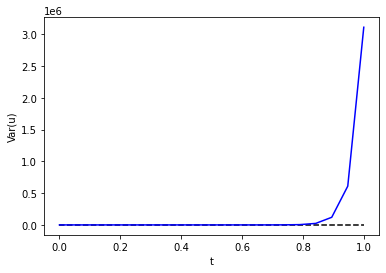

In [29]:
title  = ""
ylabel = "Var(u)"
xlabel = "t"

plt.figure()
plt.plot(ts, heat_analyt_variance(ts,nu), color='k', linestyle='dashed')
plt.plot(ts, yr_var, color='blue')
plt.title(title)
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()